In [1]:
# 整理資料都pandas
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 進到機器學習使用numpy
import numpy as np
# 把資料與分類答案拆開
x = np.array(df.drop(["ans"], axis=1))
y = np.array(df["ans"])

In [4]:
# 使用sklearn內建函式分割訓練測試資料集
from sklearn.model_selection import train_test_split

In [5]:
# 多組資料順序不變
train_test_split([1,2,3,4], [1,2,3,4], [5,6,7,8], test_size=0.25)

[[4, 2, 3], [1], [4, 2, 3], [1], [8, 6, 7], [5]]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [7]:
# 把訓練資料丟給演算法學習(fit)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [44, 44, 47]\nclass = virginica'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 44\nvalue = [44, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 91\nvalue = [0, 44, 47]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.187\nsamples = 48\nvalue = [0, 43, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.045\nsamples = 43\nvalue = [0, 1, 42]\nclass = virginica')]

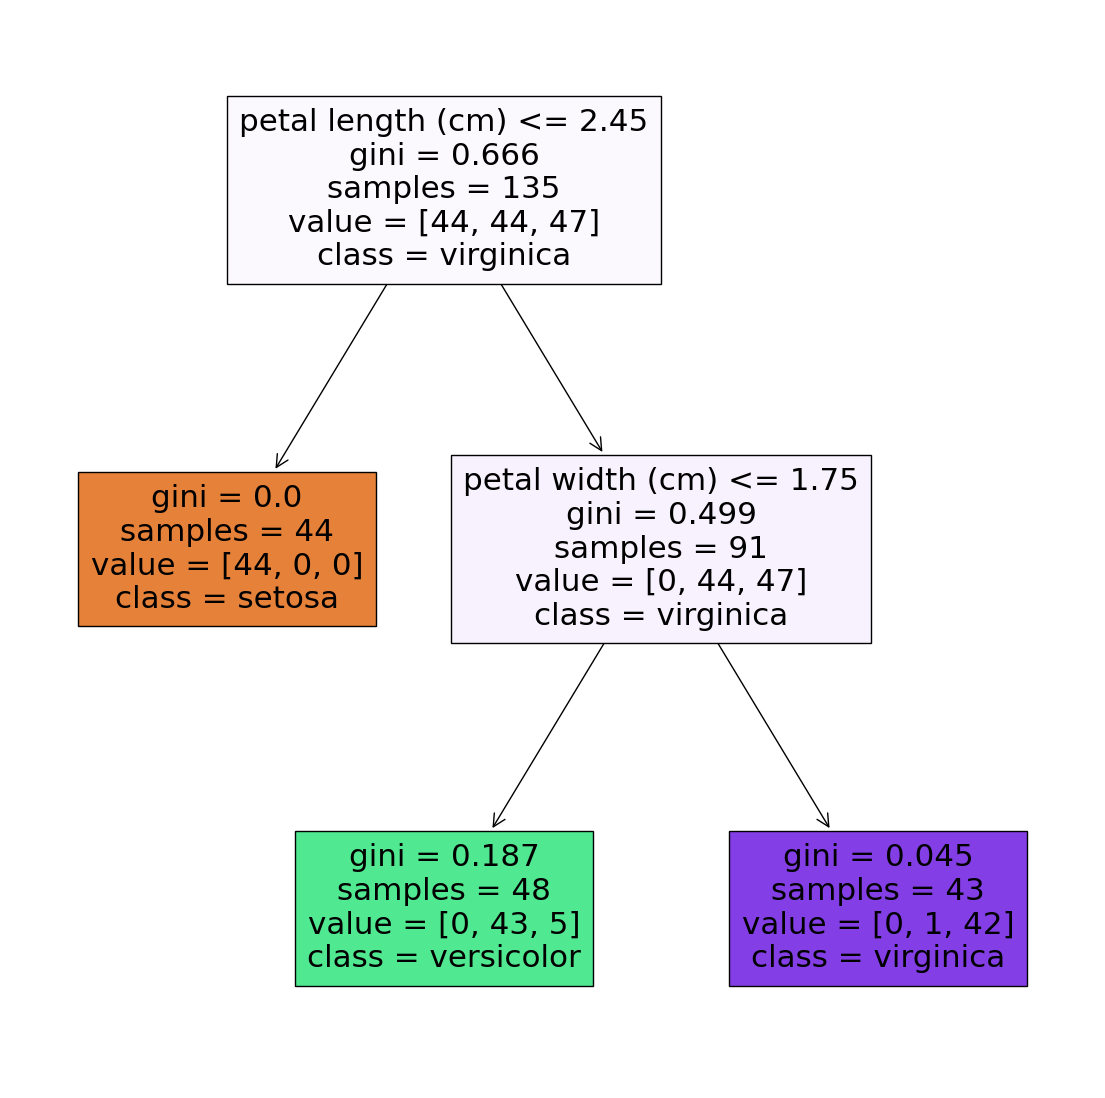

In [8]:
# 繪出決策樹
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, 
     feature_names=iris["feature_names"],
     class_names=iris["target_names"],
     filled = True)

In [9]:
# 測試模型表現
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

1.0